In [3]:
#omni and cluster time series

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM
import glob
from XMA_finder import XMA_finder
import datetime as dt

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.dates as mdates

In [2]:
#read in CSV for OMNI averages

omni_ave_list = []

omni_path = "/Users/apx059/Documents/1_Yr_Data/1 Year GIPM Sorted/Omni Averages/**"
omni_list_all = []

for path in glob.glob(omni_path, recursive=True):
    omni_list_all.append(path)
    
#list with only files, not folders

for element in omni_list_all:
    if '.csv' in element:
        omni_ave_list.append(element)
        
omni_ave_dfs = []

for file in omni_ave_list:
    df = pd.read_csv(file)
    omni_ave_dfs.append(df)
    
omni_ave_all = pd.concat(omni_ave_dfs)
XMA_all = XMA_finder(omni_ave_all)

omni_ave_all['datetime'] = pd.to_datetime(omni_ave_all['datetime'],format='mixed')
omni_ave_all = omni_ave_all.set_index('datetime')

In [7]:
om_yr = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/OMNI_Raw_CSVs/omni_hros_1min_20010201000000_20020201000000.csv')
om_yr['datetime'] = pd.to_datetime(om_yr['datetime'],format='mixed')
om_yr = om_yr.set_index('datetime')

In [25]:
df_a = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-14 07:17:00.031000.csv')
df_a['datetime'] = pd.to_datetime(df_a['datetime'],format='mixed')
df_a = df_a.set_index('datetime')

sixmin_start_a = pd.to_datetime('2001-02-14 20:53:00')
six_min_end_a = pd.to_datetime('2001-02-14 20:59:00')
tc_a = pd.to_datetime('2001-02-14 20:56:00')
#filter

df_6mins_a = df_a.loc[((df_a.index >= sixmin_start_a) & (df_a.index < six_min_end_a))]
om_6mins_a = om_yr.loc[((om_yr.index >= sixmin_start_a) & (om_yr.index < six_min_end_a))]

In [5]:
om_6mins_ave = omni_ave_all.loc[((omni_ave_all.index >= sixmin_start_a) & (omni_ave_all.index < six_min_end_a))]

In [3]:
def sixminTS(df, OMNI_data, tc):
    
    fig, ax = plt.subplots(3, figsize=(6, 10))
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    twomin_start = tc - dt.timedelta(minutes=1)
    twomin_end = tc + dt.timedelta(minutes=1)
    fourmin_start = tc - dt.timedelta(minutes=2)
    fourmin_end = tc + dt.timedelta(minutes=2)
    sixmin_start = tc - dt.timedelta(minutes=3)
    sixmin_end = tc + dt.timedelta(minutes=3)

    ax[0].plot(OMNI_data.index, OMNI_data['cone angle'], color = 'b')
    ax[0].set_ylabel(r"$cone angle, \degree$")
    ax[0].set_ylim(0,90)
    ax[0].set_yticks(ticks=[0,15,30,45,60,75,90])
    ax[0].set_xlim(sixmin_start, sixmin_end)
    ax[0].xaxis.set_major_formatter(formatter)
    ax[0].xaxis.set_minor_locator(AutoMinorLocator())
    ax[0].set_axisbelow(True)
    ax[0].yaxis.grid(color='lightgray')
    ax[0].xaxis.grid(color='lightgray')
    
    ax[1].plot(OMNI_data.index, OMNI_data['B_mag'], color = 'k', label='Bmag')
    ax[1].plot(OMNI_data.index, OMNI_data['Bx_gse'], color = 'g', label='Bx')
    ax[1].plot(OMNI_data.index, OMNI_data['By_gse'], color = 'b', label='By')
    ax[1].plot(OMNI_data.index, OMNI_data['Bz_gse'], color = 'r', label='Bz')
    ax[1].axhline(y=0, ls='--',c='darkslategrey')
    ax[1].xaxis.set_major_formatter(formatter)
    ax[1].xaxis.set_minor_locator(AutoMinorLocator())
    ax[1].set_xlim(sixmin_start, sixmin_end)
    ax[1].set_ylabel("$OMNI B, nT$")
    ax[1].set_axisbelow(True)
    ax[1].yaxis.grid(color='lightgray')
    ax[1].xaxis.grid(color='lightgray')
    ax[1].legend()
    
    
    ax[2].plot(df.index, df['B_mag'], color = 'k', label='Bmag')
    ax[2].plot(df.index, df['Bx_gse'], color = 'g', label='Bx')
    ax[2].plot(df.index, df['By_gse'], color = 'b', label='By')
    ax[2].plot(df.index, df['Bz_gse'], color = 'r', label='Bz')
    ax[2].axhline(y=0, ls='--', c='darkslategrey')
    ax[2].set_ylabel("Cluster B, nT")
    ax[2].xaxis.set_major_formatter(formatter)
    ax[2].xaxis.set_minor_locator(AutoMinorLocator())
    ax[2].set_xlim(sixmin_start, sixmin_end)
    ax[2].axvspan(twomin_start, twomin_end, facecolor='silver', alpha=0.5)
    ax[2].axvspan(fourmin_start, fourmin_end, facecolor='gainsboro', alpha=0.5)
    ax[2].set_axisbelow(True)
    ax[2].yaxis.grid(color='lightgray')
    ax[2].xaxis.grid(color='lightgray')
    #ax[2].legend()
    
    plt.show()
    

In [27]:
sixminTS(df_6mins_a, om_6mins_a, tc_a)

NameError: name 'df_6mins_a' is not defined

In [5]:
df_aa = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-31 12:38:00.009000C3.csv')
df_aa['datetime'] = pd.to_datetime(df_aa['datetime'],format='mixed')
df_aa = df_aa.set_index('datetime')

In [38]:
sixmin_start_aa = pd.to_datetime('2001-03-31 20:20:00')
six_min_end_aa = pd.to_datetime('2001-03-31 20:26:00')

tc_aa = pd.to_datetime('2001-03-31 20:23:00')
#filter

df_6mins_aa = df_aa.loc[((df_aa.index >= sixmin_start_aa) & (df_aa.index < six_min_end_aa))]
om_6mins_aa = om_yr.loc[((om_yr.index >= sixmin_start_aa) & (om_yr.index <= six_min_end_aa))]

om_6mins_ave_aa = omni_ave_all.loc[((omni_ave_all.index >= sixmin_start_aa) & (omni_ave_all.index < six_min_end_aa))]

In [7]:
om_6mins_ave_aa_sort =om_6mins_ave_aa.iloc[:3]
om_6mins_ave_aa_sort = om_6mins_ave_aa_sort.sort_index()

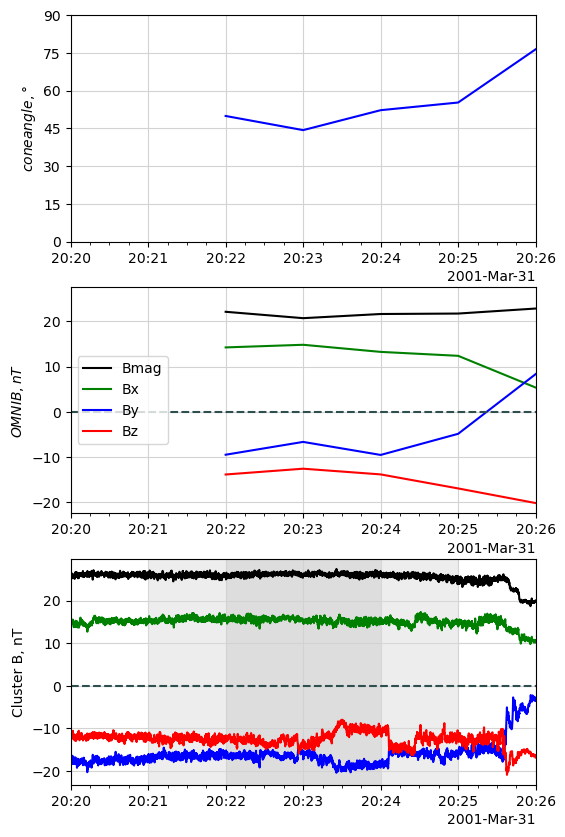

In [39]:
sixminTS(df_6mins_aa, om_6mins_aa, tc_aa)

In [15]:
df_v = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-20 20:01:33.524000C2.csv')
df_v['datetime'] = pd.to_datetime(df_v['datetime'],format='mixed')
df_v = df_v.set_index('datetime')

In [67]:
sixmin_start_v = pd.to_datetime('2002-01-21 13:48:00')
six_min_end_v = pd.to_datetime('2002-01-21 13:54:00')

tenmin_start_v = pd.to_datetime('2002-01-21 13:46:00')
ten_min_end_v = pd.to_datetime('2002-01-21 13:56:00')
#filter

df_10mins_v = df_v.loc[((df_v.index >= tenmin_start_v) & (df_v.index < ten_min_end_v))]
om_10mins_v = om_yr.loc[((om_yr.index >= tenmin_start_v) & (om_yr.index < ten_min_end_v))]

om_6mins_ave_v = omni_ave_all.loc[((omni_ave_all.index >= sixmin_start_v) & (omni_ave_all.index < six_min_end_v))]

In [68]:
om_6mins_ave_v_sort = om_6mins_ave_v.sort_index()

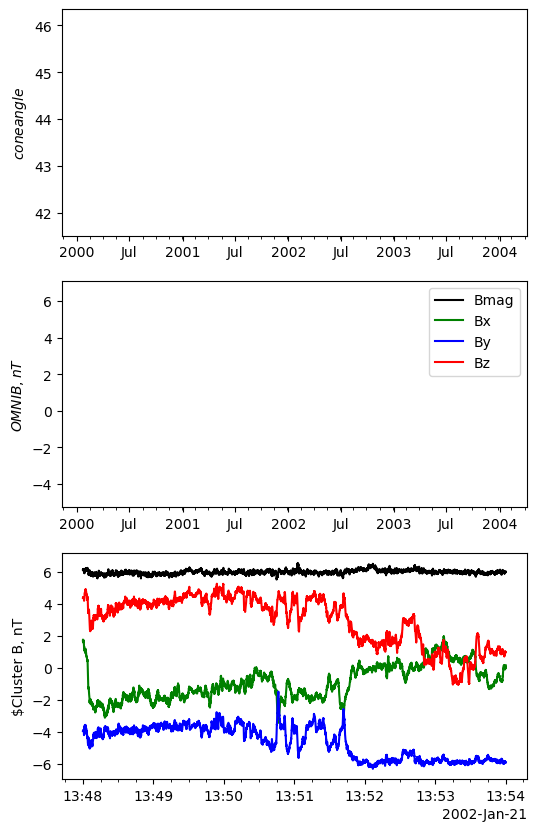

In [71]:
sixminTS(df_6mins_v, om_10mins_v)

In [28]:
df_f = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/Feb-March-2001/C2_2001-02-12 22:09:00.008000.csv')
df_f['datetime'] = pd.to_datetime(df_f['datetime'],format='mixed')
df_f = df_f.set_index('datetime')

sixmin_start_f = pd.to_datetime('2001-02-13 13:27:00')
six_min_end_f = pd.to_datetime('2001-02-13 13:33:00')

#filter

df_6mins_f = df_f.loc[((df_f.index >= sixmin_start_f) & (df_f.index < six_min_end_f))]
om_6mins_f = om_yr.loc[((om_yr.index >= sixmin_start_f) & (om_yr.index < six_min_end_f))]

om_6mins_ave_f = omni_ave_all.loc[((omni_ave_all.index >= sixmin_start_f) & (omni_ave_all.index < six_min_end_f))]

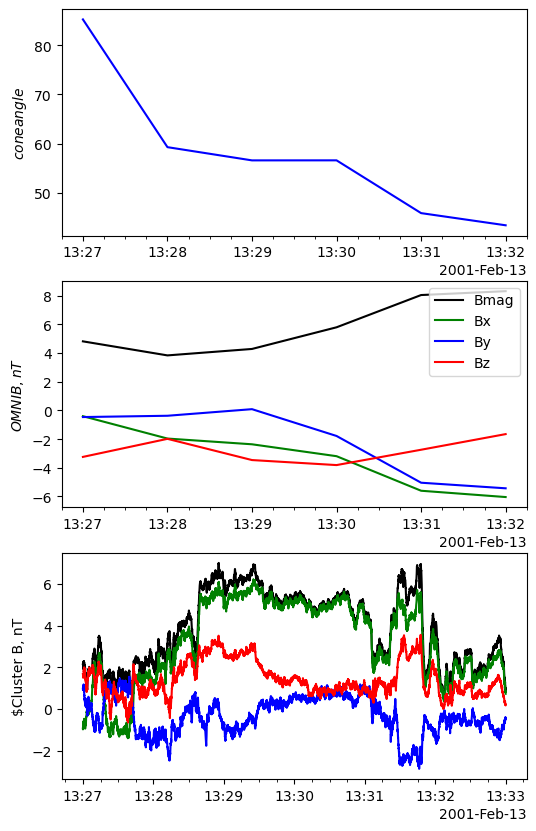

In [29]:
sixminTS(df_6mins_f, om_6mins_f)

In [39]:
df_zz = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/48_Weeks_CSVs/Dec-Feb/2002-01-01 16:12:00.009000C1.csv')
df_zz['datetime'] = pd.to_datetime(df_zz['datetime'],format='mixed')
df_zz = df_zz.set_index('datetime')

sixmin_start_zz = pd.to_datetime('2002-01-02 12:44:00')
six_min_end_zz = pd.to_datetime('2002-01-02 12:50:00')

#filter

df_6mins_zz = df_zz.loc[((df_zz.index >= sixmin_start_zz) & (df_zz.index < six_min_end_zz))]
om_6mins_zz = om_yr.loc[((om_yr.index >= sixmin_start_zz) & (om_yr.index < six_min_end_zz))]

om_6mins_ave_zz = omni_ave_all.loc[((omni_ave_all.index >= sixmin_start_zz) & (omni_ave_all.index < six_min_end_zz))]

In [55]:
om_6mins_ave_zz_sort = om_6mins_ave_zz.sort_index()

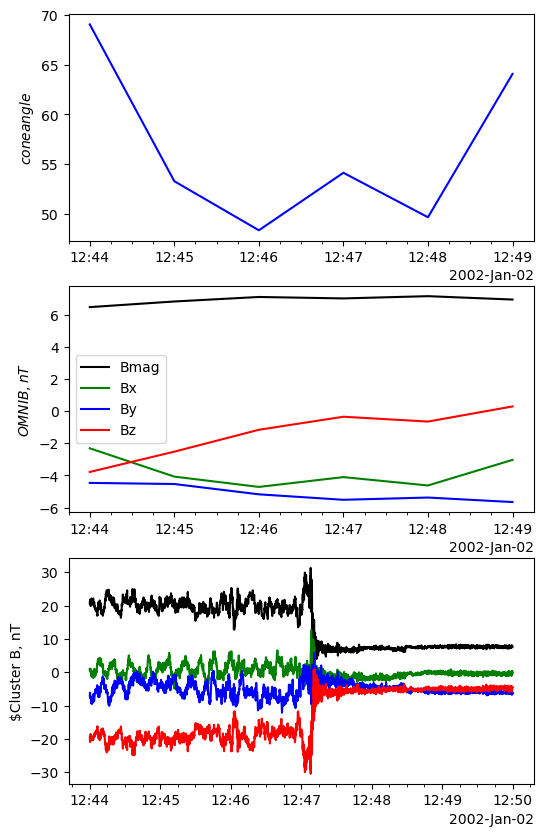

In [40]:
sixminTS(df_6mins_zz, om_6mins_zz)

In [ ]:
df_ya = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/48_Weeks_CSVs/Dec-Feb/2001-12-24 10:25:56.985000C2.csv')
df_ya['datetime'] = pd.to_datetime(df_ya['datetime'],format='mixed')
df_ya = df_ya.set_index('datetime')

#mask to relevant 6 mins for each of those
time_start_ya = pd.to_datetime('2001-12-24 11:18:00')
time_end_ya = pd.to_datetime('2001-12-24 11:24:00')

df_6mins_ya = df_ya.loc[((df_ya.index >= time_start_ya) & (df_ya.index < time_end_ya))]
om_6mins_ya = om_yr.loc[((om_yr.index >= time_start_ya) & (om_yr.index <= time_end_ya))]

om_6mins_ave_ya = omni_ave_all.loc[((omni_ave_all.index >= time_start_ya) & (omni_ave_all.index < time_end_ya))]

In [59]:
om_6mins_ave_ya = om_6mins_ave_ya.sort_index()

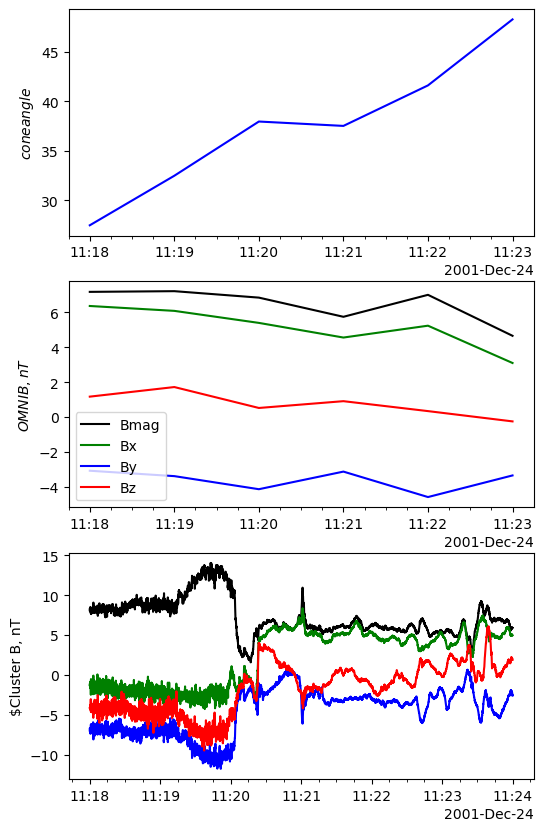

In [43]:
sixminTS(df_6mins_ya, om_6mins_ya)

In [72]:
df_yy = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/48_Weeks_CSVs/March-April/2001-04-10 12:57:09.646000C3.csv')
df_yy['datetime'] = pd.to_datetime(df_yy['datetime'],format='mixed')
df_yy = df_yy.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_yy = pd.to_datetime('2001-04-10 18:05:00')
time_end_yy = pd.to_datetime('2001-04-10 18:11:00')

df_6mins_yy = df_yy.loc[((df_yy.index >= time_start_yy) & (df_yy.index < time_end_yy))]
om_6mins_yy = om_yr.loc[((om_yr.index >= time_start_yy) & (om_yr.index < time_end_yy))]

om_6mins_ave_yy = omni_ave_all.loc[((omni_ave_all.index >= time_start_yy) & (omni_ave_all.index < time_end_yy))]

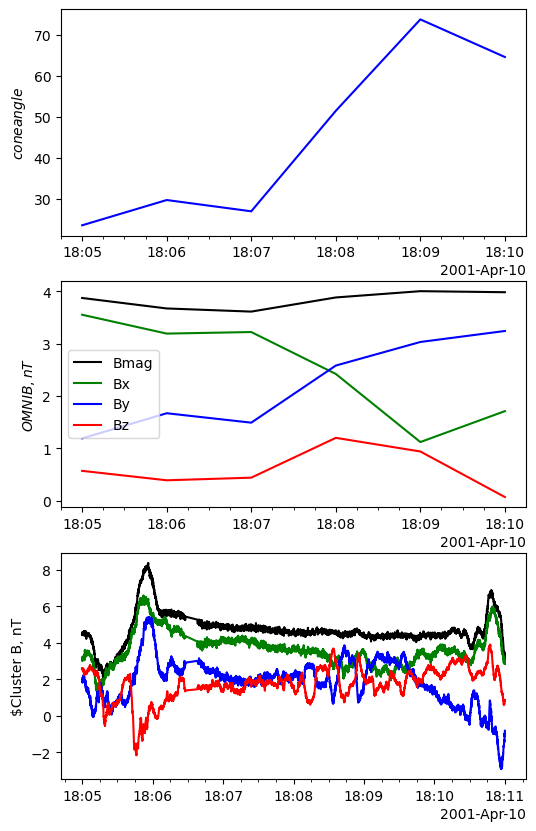

In [73]:
sixminTS(df_6mins_yy, om_6mins_yy)

In [35]:
df_tc = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-29 03:33:00.027000C3.csv')
df_tc['datetime'] = pd.to_datetime(df_tc['datetime'],format='mixed')
df_tc = df_tc.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_tc = pd.to_datetime('2001-03-29 11:53:00')
time_end_tc = pd.to_datetime('2001-03-29 11:59:00')
tc_tc = pd.to_datetime('2001-03-29 11:56:00')

df_6mins_tc = df_tc.loc[((df_tc.index >= time_start_tc) & (df_tc.index < time_end_tc))]
om_6mins_tc = om_yr.loc[((om_yr.index >= time_start_tc) & (om_yr.index <= time_end_tc))]

om_6mins_ave_tc = omni_ave_all.loc[((omni_ave_all.index >= time_start_tc) & (omni_ave_all.index < time_end_tc))]

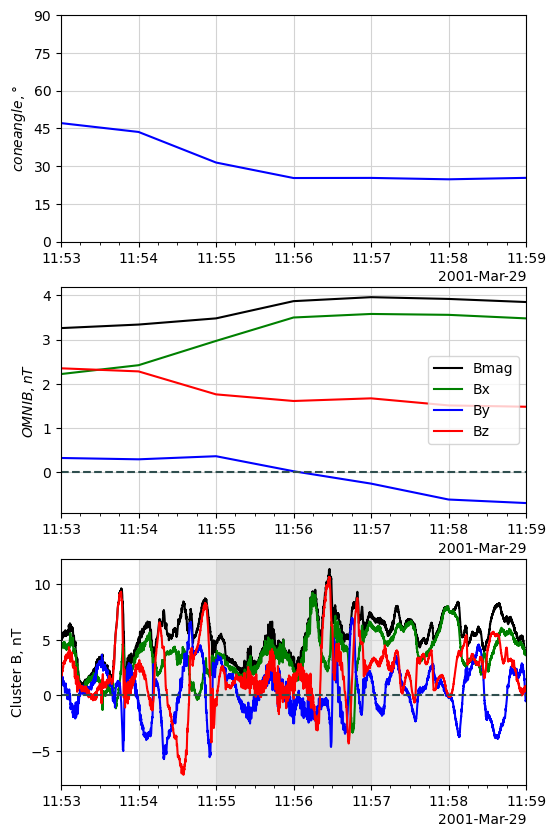

In [36]:
sixminTS(df_6mins_tc, om_6mins_tc, tc_tc)

In [40]:
#2001-03-19 18:07:00
df_va = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-03-19 14:59:00.032000C1.csv')
df_va['datetime'] = pd.to_datetime(df_va['datetime'],format='mixed')
df_va = df_va.set_index('datetime')

#mask to relevant 2 mins for each of those
time_start_va = pd.to_datetime('2001-03-19 18:05:00')
time_end_va = pd.to_datetime('2001-03-19 18:11:00')
tc_va = pd.to_datetime('2001-03-19 18:08:00')

df_6mins_va = df_va.loc[((df_va.index >= time_start_va) & (df_va.index < time_end_va))]
om_6mins_va = om_yr.loc[((om_yr.index >= time_start_va) & (om_yr.index <= time_end_va))]

om_6mins_ave_va = omni_ave_all.loc[((omni_ave_all.index >= time_start_va) & (omni_ave_all.index < time_end_va))]

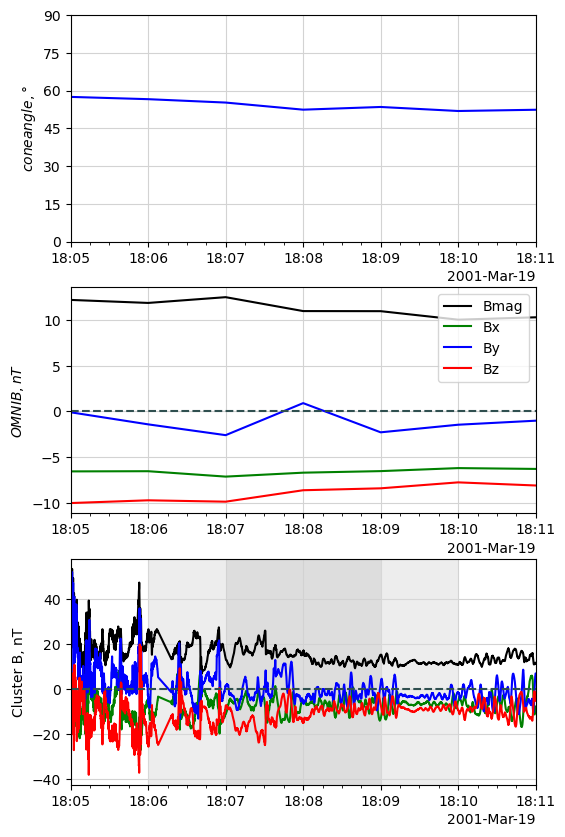

In [41]:
sixminTS(df_6mins_va, om_6mins_va, tc_va)

In [20]:
#2002-01-17 07:25:00
df_wa = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Dec-Feb/2002-01-17 06:41:21.192000C1.csv')
df_wa['datetime'] = pd.to_datetime(df_wa['datetime'],format='mixed')
df_wa = df_wa.set_index('datetime')


#mask to relevant 2 mins for each of those
time_start_wa = pd.to_datetime('2002-01-17 07:25:00')
time_end_wa = pd.to_datetime('2002-01-17 07:27:00')

df_6mins_wa = df_wa.loc[((df_wa.index >= time_start_wa) & (df_wa.index < time_end_wa))]
om_6mins_wa = om_yr.loc[((om_yr.index >= time_start_wa) & (om_yr.index < time_end_wa))]

om_6mins_ave_wa = omni_ave_all.loc[((omni_ave_all.index >= time_start_wa) & (omni_ave_all.index < time_end_wa))]

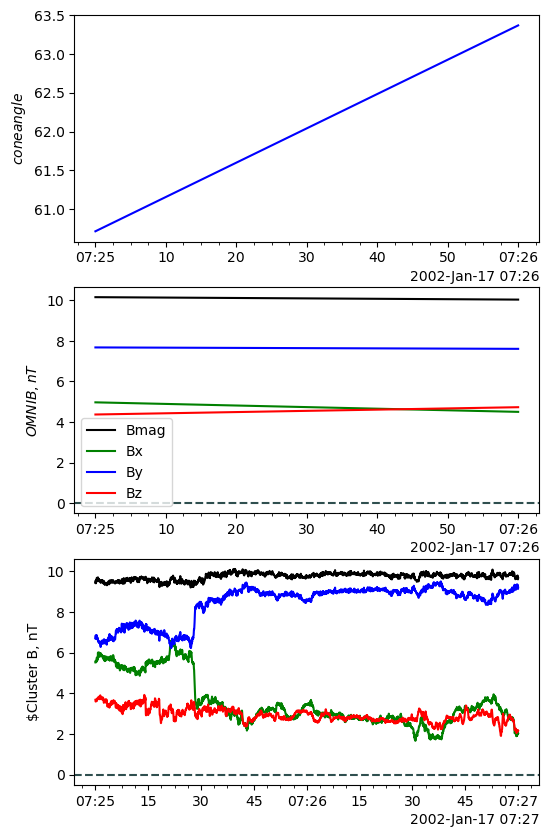

In [21]:
sixminTS(df_6mins_wa, om_6mins_wa)

In [6]:
#'2001-02-15 07:15:00'
df_ma_1 = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-14 07:17:00.031000.csv')
df_ma_2 = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-15 07:17:00.033000.csv')
df_ma = pd.concat([df_ma_1, df_ma_2])
df_ma['datetime'] = pd.to_datetime(df_ma['datetime'],format='mixed')
df_ma = df_ma.set_index('datetime')


#mask to relevant 6 mins for each of those
time_start_ma = pd.to_datetime('2001-02-15 07:13:00')
time_end_ma = pd.to_datetime('2001-02-15 07:19:00')

df_6mins_ma = df_ma.loc[((df_ma.index >= time_start_ma) & (df_ma.index < time_end_ma))]
om_6mins_ma = om_yr.loc[((om_yr.index >= time_start_ma) & (om_yr.index < time_end_ma))]

om_6mins_ave_ma = omni_ave_all.loc[((omni_ave_all.index >= time_start_ma) & (omni_ave_all.index < time_end_ma))]

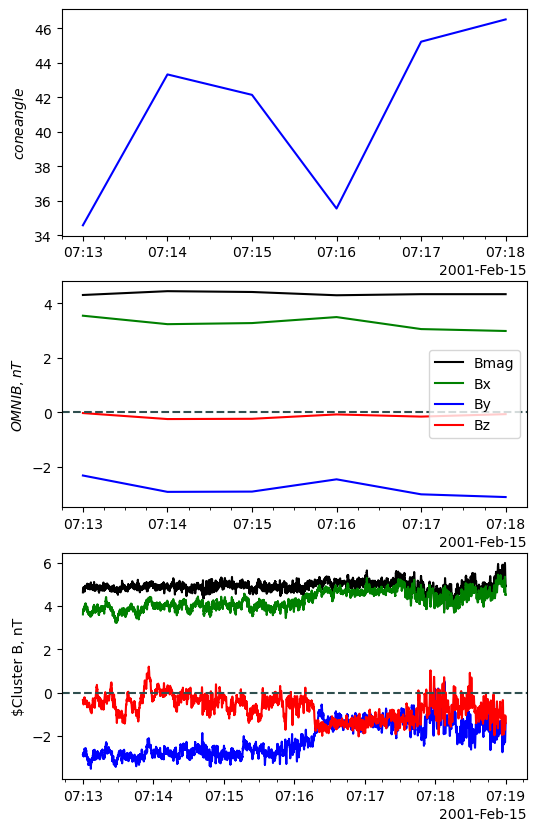

In [7]:
sixminTS(df_6mins_ma, om_6mins_ma)

In [42]:
#'2001-02-15 07:15:00'
df_east = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-22 22:40:00.005000C1.csv')
df_east['datetime'] = pd.to_datetime(df_east['datetime'],format='mixed')
df_east = df_east.set_index('datetime')

#mask to relevant 6 mins for each of those
time_start_east = pd.to_datetime('2001-04-23 05:02:00')
time_end_east = pd.to_datetime('2001-04-23 05:08:00')
tc_east = pd.to_datetime('2001-04-23 05:05:00')

df_6mins_east = df_east.loc[((df_east.index >= time_start_east) & (df_east.index < time_end_east))]
om_6mins_east = om_yr.loc[((om_yr.index >= time_start_east) & (om_yr.index <= time_end_east))]

om_6mins_ave_east = omni_ave_all.loc[((omni_ave_all.index >= time_start_east) & (omni_ave_all.index < time_end_east))]

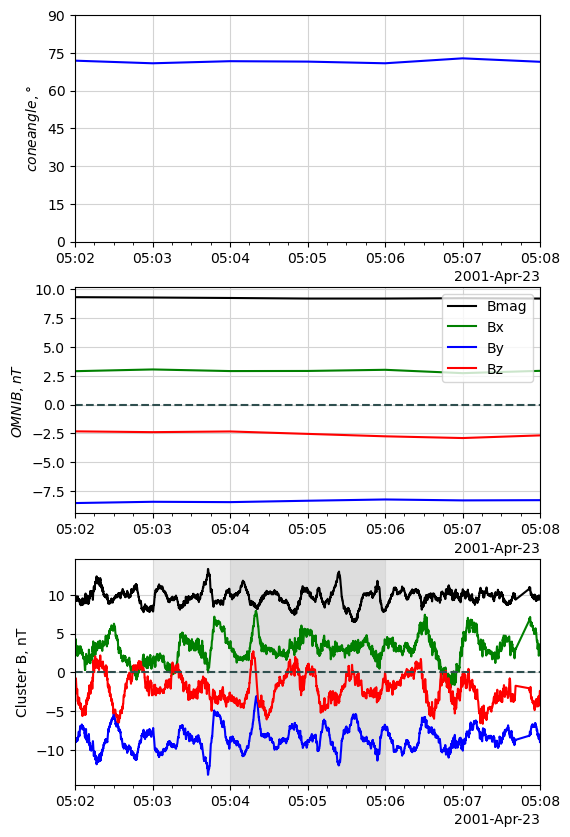

In [43]:
sixminTS(df_6mins_east, om_6mins_east, tc_east)

In [20]:
time_start_2_east = pd.to_datetime('2001-04-23 05:04:00')
time_end_2_east = pd.to_datetime('2001-04-23 05:06:00')

df_two_east = df_east.loc[((df_east.index >= time_start_2_east) & (df_east.index < time_end_2_east))]
df_two_east.describe()

,Bx_gse,By_gse,Bz_gse,B_mag,X_gse,Y_gse,Z_gse,R_GSE
count,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000,2691.000000
mean,3.272313,-8.379355,-2.066656,9.529753,10.492832,-15.298770,-2.194791,18.680713
std,1.178222,1.479894,1.869420,1.203209,0.003646,0.001210,0.005228,0.002424
min,0.457000,-12.007000,-6.085000,6.474000,10.486517,-15.300863,-2.203845,18.676512
25%,2.485500,-9.278000,-3.563500,8.756000,10.489673,-15.299812,-2.199317,18.678615
50%,3.060000,-8.579000,-2.365000,9.682000,10.492826,-15.298776,-2.194789,18.680715
75%,3.784000,-7.474500,-0.564000,10.275000,10.495989,-15.297724,-2.190269,18.682808
max,7.907000,-3.111000,2.675000,12.989000,10.499137,-15.296673,-2.185732,18.684908


In [ ]:
#'2001-02-15 07:15:00'
df_ma_1 = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-14 07:17:00.031000.csv')
df_ma_2 = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/Feb-March-2001/C1_2001-02-15 07:17:00.033000.csv')
df_ma = pd.concat([df_ma_1, df_ma_2])
df_ma['datetime'] = pd.to_datetime(df_ma['datetime'],format='mixed')
df_ma = df_ma.set_index('datetime')


#mask to relevant 6 mins for each of those
time_start_ma = pd.to_datetime('2001-02-15 07:13:00')
time_end_ma = pd.to_datetime('2001-02-15 07:19:00')

df_6mins_ma = df_ma.loc[((df_ma.index >= time_start_ma) & (df_ma.index < time_end_ma))]
om_6mins_ma = om_yr.loc[((om_yr.index >= time_start_ma) & (om_yr.index < time_end_ma))]

om_6mins_ave_ma = omni_ave_all.loc[((omni_ave_all.index >= time_start_ma) & (omni_ave_all.index < time_end_ma))]

In [34]:
def twentyminTS(df, OMNI_data, tc):
    
    fig, ax = plt.subplots(3, figsize=(8, 10))
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    twomin_start = tc - dt.timedelta(minutes=1)
    twomin_end = tc + dt.timedelta(minutes=1)
    fourmin_start = tc - dt.timedelta(minutes=2)
    fourmin_end = tc + dt.timedelta(minutes=2)
    sixmin_start = tc - dt.timedelta(minutes=3)
    sixmin_end = tc + dt.timedelta(minutes=3)
    tenmin_start = tc - dt.timedelta(minutes=5)
    tenmin_end = tc + dt.timedelta(minutes=5)
    twentymin_start = tc - dt.timedelta(minutes=10)
    twentymin_end = tc + dt.timedelta(minutes=10)

    ax[0].plot(OMNI_data.index, OMNI_data['cone angle'], color = 'b')
    ax[0].set_ylabel(r"$cone angle, \degree$")
    ax[0].set_ylim(0,90)
    ax[0].set_yticks(ticks=[0,15,30,45,60,75,90])
    ax[0].set_xlim(twentymin_start, twentymin_end)
    ax[0].xaxis.set_major_formatter(formatter)
    ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[0].set_axisbelow(True)
    ax[0].yaxis.grid(color='lightgray')
    ax[0].xaxis.grid(color='lightgray')
    
    ax[1].plot(OMNI_data.index, OMNI_data['B_mag'], color = 'k', label='Bmag')
    ax[1].plot(OMNI_data.index, OMNI_data['Bx_gse'], color = 'g', label='Bx')
    ax[1].plot(OMNI_data.index, OMNI_data['By_gse'], color = 'b', label='By')
    ax[1].plot(OMNI_data.index, OMNI_data['Bz_gse'], color = 'r', label='Bz')
    ax[1].axhline(y=0, ls='--',c='darkslategrey')
    ax[1].xaxis.set_major_formatter(formatter)
    ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1].set_xlim(twentymin_start, twentymin_end)
    ax[1].set_ylabel("$OMNI B, nT$")
    ax[1].set_axisbelow(True)
    ax[1].yaxis.grid(color='lightgray')
    ax[1].xaxis.grid(color='lightgray')
    ax[1].legend()
    
    
    ax[2].plot(df.index, df['B_mag'], color = 'k', label='Bmag')
    ax[2].plot(df.index, df['Bx_gse'], color = 'g', label='Bx')
    ax[2].plot(df.index, df['By_gse'], color = 'b', label='By')
    ax[2].plot(df.index, df['Bz_gse'], color = 'r', label='Bz')
    ax[2].axhline(y=0, ls='--', c='darkslategrey')
    ax[2].axvline(x=twomin_start, ls='--', c='dimgrey')
    ax[2].axvline(x=twomin_end, ls='--', c='dimgrey')
    ax[2].axvline(x=fourmin_start, ls='--', c='darkgrey')
    ax[2].axvline(x=fourmin_end, ls='--', c='darkgrey')
    ax[2].axvline(x=tenmin_start, ls='--', c='silver')
    ax[2].axvline(x=tenmin_end, ls='--', c='silver')
    ax[2].set_ylabel("Cluster B, nT")
    ax[2].xaxis.set_major_formatter(formatter)
    ax[2].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[2].set_xlim(twentymin_start, twentymin_end)
    ax[2].axvspan(twomin_start, twomin_end, facecolor='dimgrey', alpha=0.5)
    ax[2].axvspan(fourmin_start, fourmin_end, facecolor='darkgrey', alpha=0.5)
    ax[2].axvspan(tenmin_start, tenmin_end, facecolor='silver', alpha=0.5)
    ax[2].axvspan(twentymin_start, twentymin_end,facecolor='white', alpha=0.5)
    ax[2].set_axisbelow(True)
    ax[2].yaxis.grid(color='lightgray')
    ax[2].xaxis.grid(color='lightgray')
    #ax[2].legend()
    
    plt.show()
    

In [17]:
#Eastwood interval WIP 
df_east20 = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-22 22:40:00.005000C1.csv')
df_east20['datetime'] = pd.to_datetime(df_east20['datetime'],format='mixed')
df_east20 = df_east20.set_index('datetime')


#mask to relevant 6 mins for each of those
time_start_east20 = pd.to_datetime('2001-04-23 05:00:00')
time_end_east20 = pd.to_datetime('2001-04-23 05:20:00')

df_20mins_east20 = df_east20.loc[((df_east20.index >= time_start_east20) & (df_east20.index <= time_end_east20))]
om_20mins_east20 = om_yr.loc[((om_yr.index >= time_start_east20) & (om_yr.index <= time_end_east20))]

tc_east20 = pd.to_datetime('2001-04-23 05:10:00')
#om_6mins_ave_ma = omni_ave_all.loc[((omni_ave_all.index >= time_start_ma) & (omni_ave_all.index < time_end_ma))]

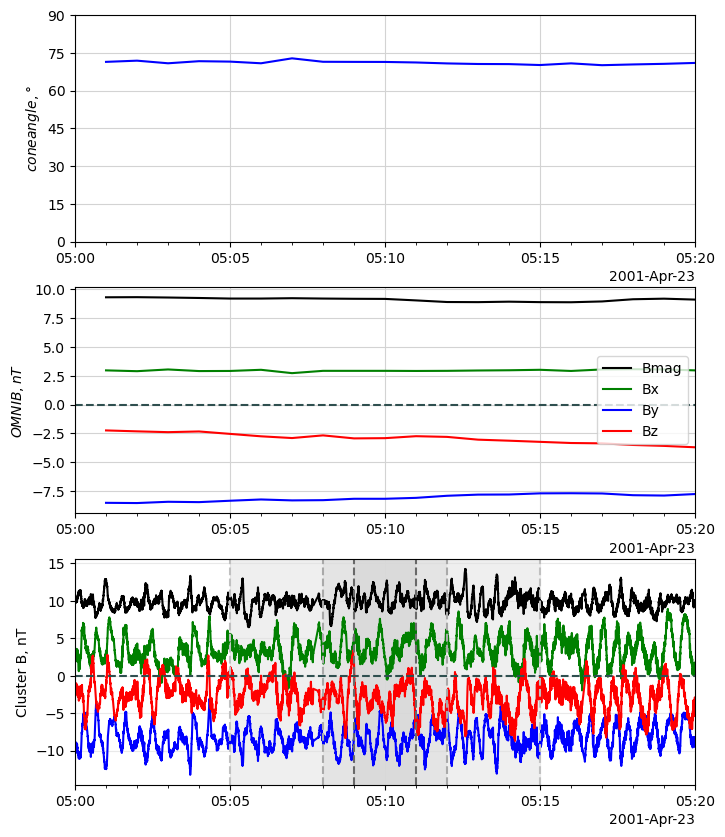

In [36]:
twentyminTS(df_20mins_east20, om_20mins_east20, tc_east20)

In [14]:
#Eastwood interval SW
df_east20_SW = pd.read_csv('/Users/apx059/Documents/1_Yr_Data/52_Weeks_CSVs/March-April/2001-04-22 22:40:00.005000C1.csv')
df_east20_SW['datetime'] = pd.to_datetime(df_east20_SW['datetime'],format='mixed')
df_east20_SW = df_east20_SW.set_index('datetime')


#mask to relevant 6 mins for each of those
time_start_east20_SW = pd.to_datetime('2001-04-23 03:40:00')
time_end_east20_SW = pd.to_datetime('2001-04-23 04:00:00')

df_20mins_east20_SW = df_east20_SW.loc[((df_east20_SW.index >= time_start_east20_SW) & (df_east20_SW.index <= time_end_east20_SW))]
om_20mins_east20_SW = om_yr.loc[((om_yr.index >= time_start_east20_SW) & (om_yr.index <= time_end_east20_SW))]

tc_east20_SW = pd.to_datetime('2001-04-23 03:50:00')
#om_6mins_ave_ma = omni_ave_all.loc[((omni_ave_all.index >= time_start_ma) & (omni_ave_all.index < time_end_ma))]

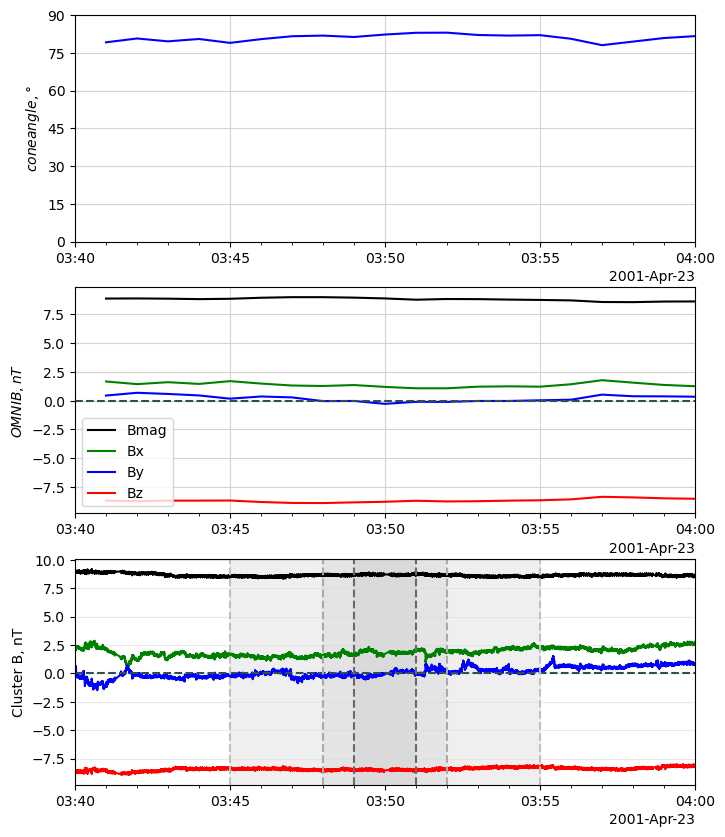

In [35]:
twentyminTS(df_20mins_east20_SW, om_20mins_east20_SW, tc_east20_SW)

In [22]:
omni_ave_dfs = []

for file in omni_ave_list:
    df = pd.read_csv(file)
    omni_ave_dfs.append(df)
    
omni_ave_all = pd.concat(omni_ave_dfs)
XMA_all = XMA_finder(omni_ave_all)

omni_ave_all['datetime'] = pd.to_datetime(omni_ave_all['datetime'],format='mixed')
omni_ave_all = omni_ave_all.set_index('datetime')

In [45]:
def sixminTS_new(df_1, df_2, tc_1, tc_2):
    
    fig, ax = plt.subplots(2, figsize=(8, 10))
    
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    sixmin_start_1 = tc_1 - dt.timedelta(minutes=3)
    sixmin_end_1 = tc_1 + dt.timedelta(minutes=3)
    sixmin_start_2 = tc_2 - dt.timedelta(minutes=3)
    sixmin_end_2 = tc_2 + dt.timedelta(minutes=3)
    

    ax[0].plot(df_1.index, df_1['B_mag'], color = 'k', label='Bmag')
    ax[0].plot(df_1.index, df_1['Bx_gse'], color = 'g', label='Bx')
    ax[0].plot(df_1.index, df_1['By_gse'], color = 'b', label='By')
    ax[0].plot(df_1.index, df_1['Bz_gse'], color = 'r', label='Bz')
    ax[0].axhline(y=0, ls='--', c='darkslategrey')
    ax[0].set_ylabel("B, nT")
    ax[0].xaxis.set_major_formatter(formatter)
    ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[0].set_xlim(sixmin_start_1, sixmin_end_1)
    ax[0].set_axisbelow(True)
    ax[0].yaxis.grid(color='lightgray')
    ax[0].xaxis.grid(color='lightgray')
    ax[0].set_title('Pristine Solar Wind')
    
    ax[1].plot(df_2.index, df_2['B_mag'], color = 'k', label='Bmag')
    ax[1].plot(df_2.index, df_2['Bx_gse'], color = 'g', label='Bx')
    ax[1].plot(df_2.index, df_2['By_gse'], color = 'b', label='By')
    ax[1].plot(df_2.index, df_2['Bz_gse'], color = 'r', label='Bz')
    ax[1].set_ylabel("B, nT")
    ax[1].xaxis.set_major_formatter(formatter)
    ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1].set_xlim(sixmin_start_2, sixmin_end_2)
    ax[1].set_axisbelow(True)
    ax[1].yaxis.grid(color='lightgray')
    ax[1].xaxis.grid(color='lightgray')
    ax[1].set_title('ULF Waves')
    
    plt.show()

    


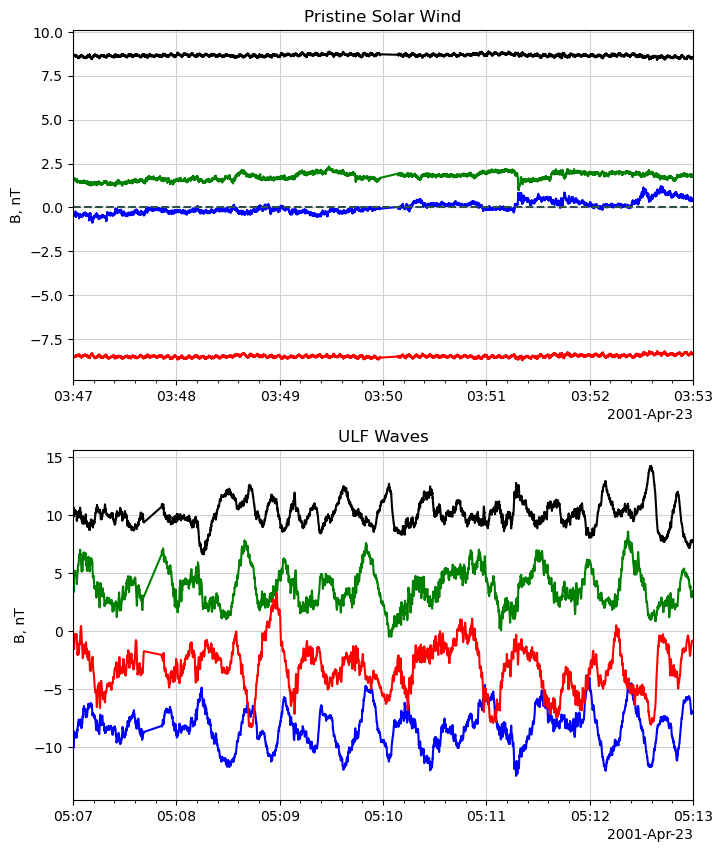

In [46]:
sixminTS_new(df_20mins_east20_SW, df_20mins_east20, tc_east20_SW, tc_east20)